# Импортирую нужные библиотеки для работы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: Задача 1
Постройте график<br>
Назовите график<br>
Сделайте именование оси x и оси y<br>
Сделайте выводы<br>

### 1.1. Скачать следующие данные: kc-house-data

In [3]:
df = pd.read_csv('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Вывожу данные по колонкам для дальнейшей работы

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  


### 1.2. Изучите стоимости недвижимости


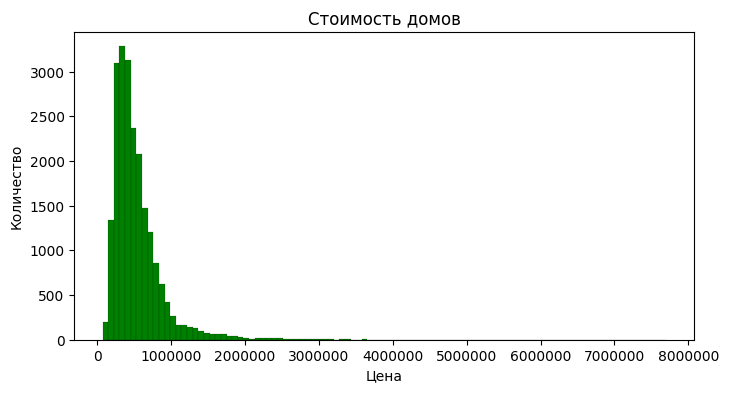

In [5]:
plt.figure(figsize=(8,4))
plt.hist(df['price'],edgecolor='black',linewidth=0.1,color='g', bins=100)
plt.ticklabel_format(axis='x', style='plain') #иначе показывало в логарифмическом представлении числа
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Стоимость домов');

### 1.3. Изучите распределение квадратуры жилой


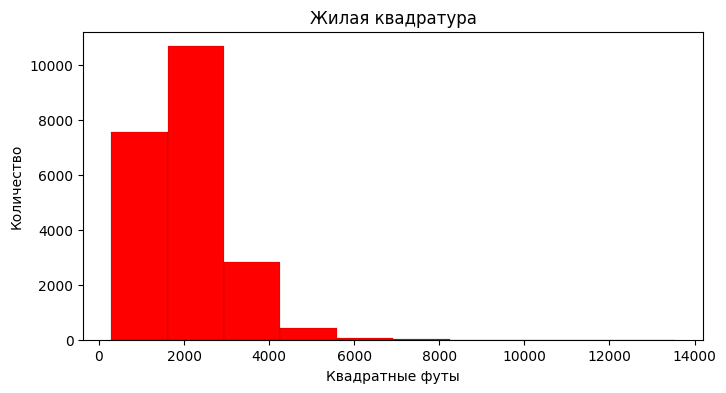

In [6]:
plt.figure(figsize=(8,4))
plt.hist(df['sqft_living'],edgecolor='black',linewidth=0.1,color='r')
plt.xlabel('Квадратные футы')
plt.ylabel('Количество')
plt.title('Жилая квадратура');

### 1.4. Изучите распределение года постройки

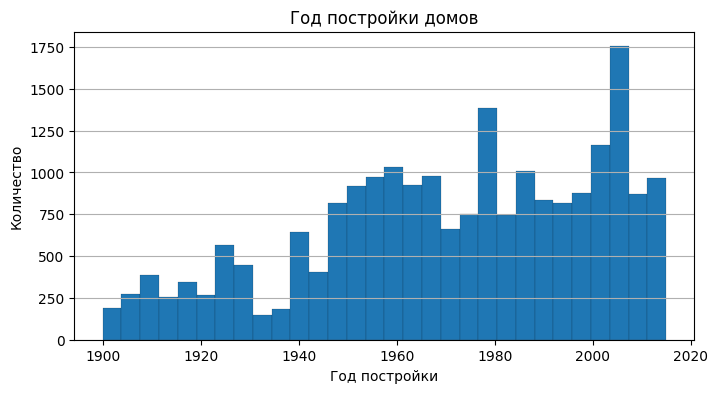

In [7]:
plt.figure(figsize=(8,4))
plt.hist(df['yr_built'],edgecolor='black',linewidth=0.1,bins = 30)
plt.grid(True, axis='y')
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Год постройки домов');

### Выводы: <br>

1. В основном дома продаются в диапозоне до 1.5млн, но есть и очень выскоие цены за дом - около 8млн
2. Средняя квадратура жилых помещений - от 1000 до 4000.
3. В основном преобладают дома построенные после 1950 года

# Условие 2: 2 задача <br>
Постройте график <br>
Сделайте выводы <br>

### 2.1. Изучите распределение домов от наличия вида на набережную


In [8]:
water_view = df['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no').value_counts()
water_view.index

Index(['no', 'yes'], dtype='object', name='waterfront')

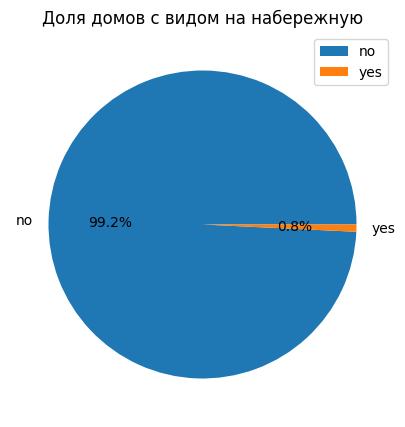

In [9]:
plt.figure(figsize=(5,5))
plt.pie(water_view.values, autopct='%1.1f%%', labels=water_view.index)
plt.title('Доля домов с видом на набережную')
plt.legend(water_view.index, loc='best');

### 2.2. Изучите распределение этажей домов


In [10]:
floors = df['floors'].apply(lambda x: str(x) +' floor').value_counts()
floors

floors
1.0 floor    10680
2.0 floor     8241
1.5 floor     1910
3.0 floor      613
2.5 floor      161
3.5 floor        8
Name: count, dtype: int64

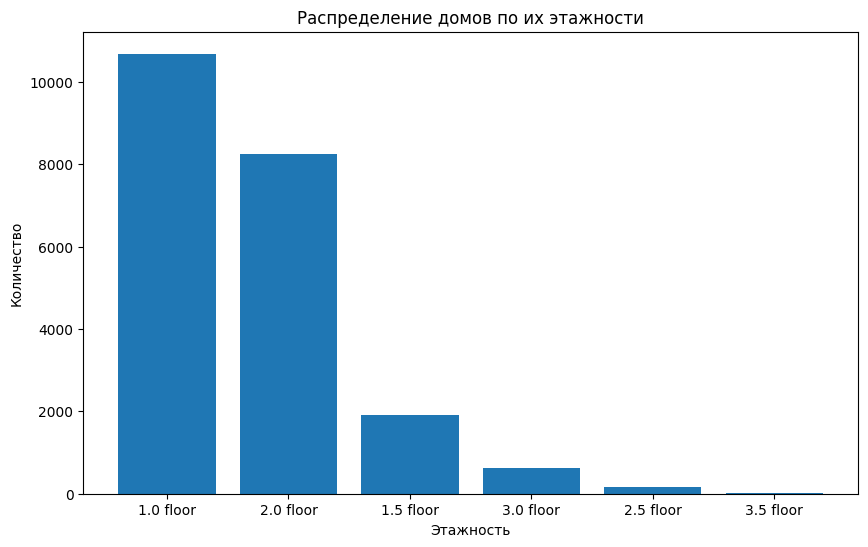

In [11]:
plt.figure(figsize=(10,6))
plt.bar(floors.index, floors.values)
plt.title('Распределение домов по их этажности')
plt.ylabel('Количество')
plt.xlabel('Этажность');


### 2.3. Изучите распределение состояния домов

In [12]:
condition = df['condition'].value_counts().sort_index()
condition

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: count, dtype: int64

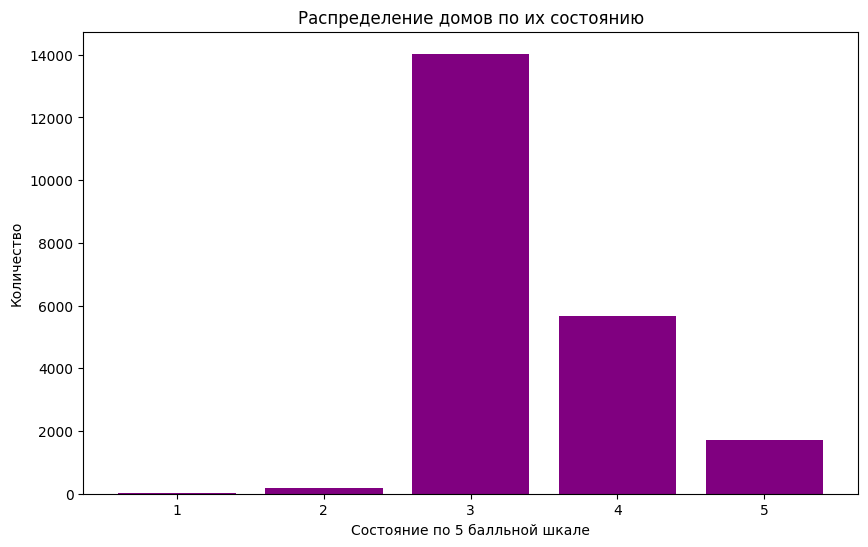

In [13]:
plt.figure(figsize=(10,6))
plt.bar(condition.index, condition.values, color ='purple')
plt.title('Распределение домов по их состоянию')
plt.ylabel('Количество')
plt.xlabel('Состояние по 5 балльной шкале');

## Выводы: <br>

1. Большинство домой не имеет вида на набережную. <br>
2. Большинство домов высотой 2 этажа <br>
3. Большинство домов в удовлетворительном состоянии, домов в плохом и ужасном состоянии почти нет.

# Условие 3: 3 задача <br>
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


Удаляю ненужны столбцы из дата фрейма.

In [14]:
df.drop(columns=['id', 'date', 'sqft_living15', 'sqft_lot15'], inplace=True)

Строю и привожу к красивому виду матрицу корреляций

In [15]:
corr_matrix = np.round(df.corr(),2)
corr_matrix[np.abs(corr_matrix) <= 0.2] = 0
upp_matt = np.triu(df.corr())
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.00,0.31,0.53,0.70,0.00,0.26,0.27,0.40,0.00,0.67,0.61,0.32,0.00,0.00,0.00,0.31,0.00
bedrooms,0.31,1.00,0.52,0.58,0.00,0.00,0.00,0.00,0.00,0.36,0.48,0.30,0.00,0.00,0.00,0.00,0.00
bathrooms,0.53,0.52,1.00,0.75,0.00,0.50,0.00,0.00,0.00,0.66,0.69,0.28,0.51,0.00,0.00,0.00,0.22
sqft_living,0.70,0.58,0.75,1.00,0.00,0.35,0.00,0.28,0.00,0.76,0.88,0.44,0.32,0.00,0.00,0.00,0.24
sqft_lot,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23
floors,0.26,0.00,0.50,0.35,0.00,1.00,0.00,0.00,-0.26,0.46,0.52,-0.25,0.49,0.00,0.00,0.00,0.00
waterfront,0.27,0.00,0.00,0.00,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.40,0.00,0.00,0.28,0.00,0.00,0.40,1.00,0.00,0.25,0.00,0.28,0.00,0.00,0.00,0.00,0.00
condition,0.00,0.00,0.00,0.00,0.00,-0.26,0.00,0.00,1.00,0.00,0.00,0.00,-0.36,0.00,0.00,0.00,0.00
grade,0.67,0.36,0.66,0.76,0.00,0.46,0.00,0.25,0.00,1.00,0.76,0.00,0.45,0.00,0.00,0.00,0.00


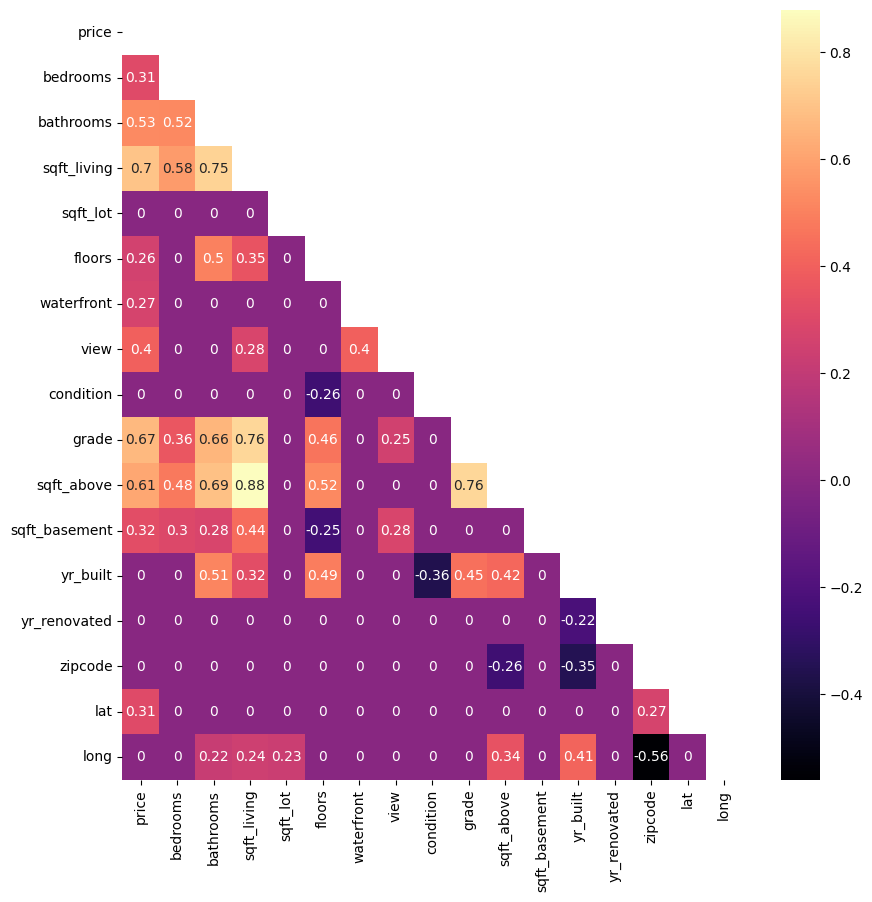

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='magma', mask = upp_matt);

По данной таблице вижу, что на цену больше всего влияет квадрутара жилой площади и оценка самого дома. Посторим граифик, чтобы в этом убедится.

Text(0.5, 0, 'Цена')

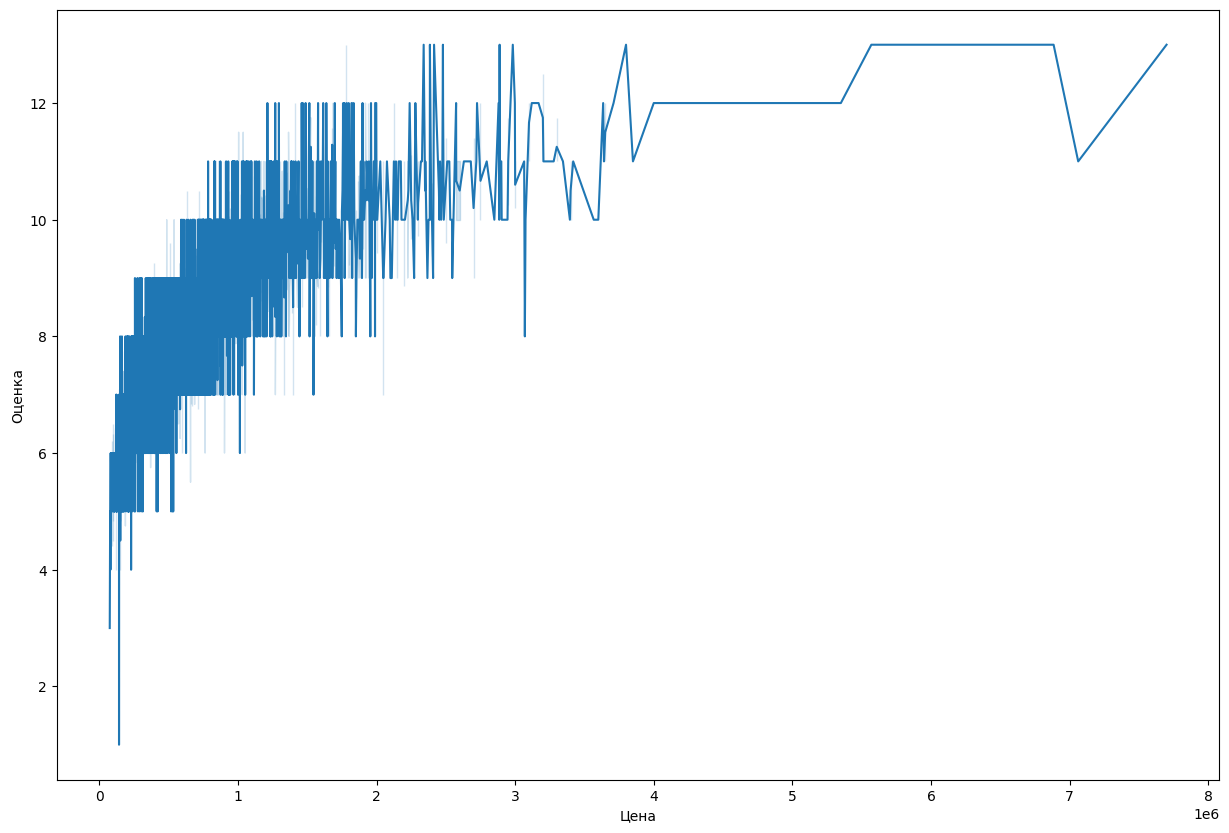

In [17]:
plt.figure(figsize=(15,10))

sns.lineplot(x=df['price'], y=df['grade'])
plt.ylabel('Оценка')
plt.xlabel('Цена')


Text(0.5, 0, 'Цена')

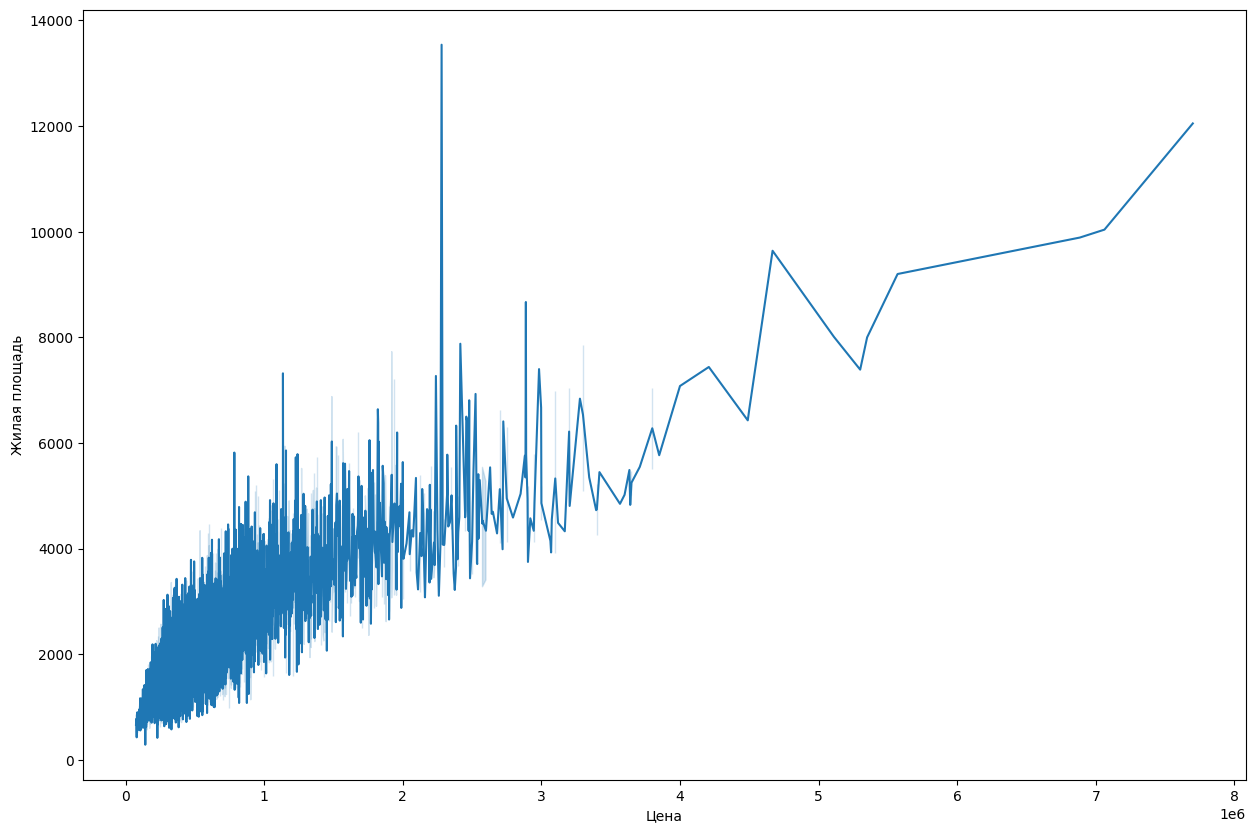

In [18]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['price'], y=df['sqft_living'])
plt.ylabel('Жилая площадь')
plt.xlabel('Цена')